In [1]:
import numpy as np
import matplotlib.pyplot as plt
import time

In [2]:
def f1(x):
    x,y,z = x
    return (x - z)**2 + (2*y + z)**2 + (4*x - 2*y + z)**2 + x + y

def grad_f1(x):
    x,y,z = x[0], x[1], x[2]
    dx = 2*(x - z) + 8*(4*x - 2*y + z) + 1
    dy = 4*(2*y + z) - 4*(4*x - 2*y + z) + 1
    dz = -2*(x - z) + 2*(2*y + z) + 2*(4*x - 2*y + z)
    
    return np.array([dx, dy, dz])

def hess_f1(x):
    dxx = 34 # 2 + 32
    dxy = -16
    dxz = 6 #-2 + 8
    dyy = 0
    dyz = 8
    dzz = 6
    
    return np.array([[dxx, dxy, dxz], [dxy, dyy, dyz], [dxz, dyz, dzz]])

In [3]:
f1_x1 = np.array([0,0,0]) 
f1(f1_x1), grad_f1(f1_x1), hess_f1(f1_x1)

(np.int64(0),
 array([1, 1, 0]),
 array([[ 34, -16,   6],
        [-16,   0,   8],
        [  6,   8,   6]]))

In [4]:
def f2(x):
    x,y,z = x
    return (x - 1)**2 + (y - 1)**2 + 100*(y-x**2)**2 + 100*(z-y**2)**2

def grad_f2(x):
    x,y,z = x[0], x[1], x[2]
    dx = 2*x - 2 - 400 * x * y + 400 * x**3
    dy = 2*y - 2 + 200 * (y - x**2) - 400*z*y + 400 * y**3
    dz = 200 * (z - y**2)
        
    return np.array([dx, dy, dz])

def hess_f2(x):
    x,y,z = x[0], x[1], x[2]
    
    dxx = 2 - 400 * y + 1200 * x**2
    dxy = -400 * x
    dxz = 0
    dyy = 2 + 200 - 400 * z + 1200 * y**2
    dyz = -400 * y
    dzz = 200
    return np.array([[dxx, dxy, dxz], [dxy, dyy, dyz], [dxz, dyz, dzz]])

In [5]:
f2_x1 = np.array([1.2, 1.2, 1.2])
f2(f2_x1), grad_f2(f2_x1), hess_f2(f2_x1)

(np.float64(11.6),
 array([115.6,  67.6, -48. ]),
 array([[1250., -480.,    0.],
        [-480., 1450., -480.],
        [   0., -480.,  200.]]))

In [6]:
def f3(x):
    x,y = x
    return (1.5 - x + x*y)**2 + (2.25 - x + x*y**2)**2 + (2.625 - x + x*y**3)**2

def grad_f3(x):
    x,y = x[0], x[1]
    
    dx = -12.75 * 6*x + 3*y - 4*x*y - 2*x*y**2 + 4.5*y**2 + 2*x*y**4 - 4*x*y**3 + 5.25 * y**3 + 2*x*y**6
    dy = 3*x + 9*y*x - 4*x**2*y - 2*x**2 + 15.75*y**2 *x + 2*x**2 * y - 6 * x**2 * y**2 + 4*x**3*y**3 + 6*x**2*y**5
    
    return np.array([dx, dy])

def hess_f3(x):
    x,y = x[0], x[1]
    
    dxx = 6 - 4*y - 2*y**2 + 2*y**4 - 4*y**3 + 2*y**6
    dxy = 3 - 4*x - 4*x*y + 9*y + 8*x*y**3 - 12*x*y**2 + 15.75*y**2 + 12*x*y**5
    dyy = 9*x - 4*x**2 + 31.5*y*x + 2*x**2 - 12*x**2*y + 12*x**2*y**2 + 30*x**2*y**4
    return np.array([[dxx, dxy], [dxy, dyy]])

In [7]:
f3_x1 = np.array([1,1])
f3(f3_x1), grad_f3(f3_x1), hess_f3(f3_x1)

(np.float64(14.203125),
 array([-69.75,  27.75]),
 array([[ 0.  , 27.75],
        [27.75, 68.5 ]]))

In [8]:
def learning_rate(i):
    return 0.01 * 0.99**i

In [9]:
def gd(x, grad_f, lr_fn, n_steps, t=None):
    
    if t is not None:
        i = 0
        start = time.time()
        while time.time() - start < t:
            x = x - lr_fn(i) * grad_f(x)
            i += 1
    else:
        for i in range(n_steps):
            x = x - lr_fn(i) * grad_f(x)
        
    return x 
    

In [10]:
def polyak(x: np.ndarray, grad_f, lr_fn, mu, n_steps, t=None):
    x_prev = x
    
    if t is not None:
        start = time.time()
        i = 0
        while time.time() - start < t:
            dx = grad_f(x)
            x = x - lr_fn(i) * dx  + mu * (x - x_prev)
        
            x_prev = x
            i+=1
    else:
        for i in range(n_steps):
            dx = grad_f(x)
            x = x - lr_fn(i) * dx  + mu * (x - x_prev)
            
            x_prev = x
        
    return x

In [11]:
def nesterov(x, f, grad_f, lr_fn, mu, n_steps, t=None):
    x_prev = x
    
    if t is not None:
        start = time.time()
        i = 0
        while time.time() - start < t:
            dx = grad_f(x + mu * (x - x_prev))
            x = x - lr_fn(i) * dx + mu * (x_prev - x)
        
            x_prev = x
            i+=1
    else:
        for i in range(n_steps):
            dx = grad_f(x + mu * (x - x_prev))
            x = x - lr_fn(i) * dx + mu * (x_prev - x)
            
            x_prev = x
        
    return x

In [12]:
def adagrad(x, grad_f, lr_fn, n_steps, eps=1e-8, t=None):
    x = np.array(x, dtype=float)
    n = len(x)
    
    grad_sq_sum = np.zeros(n)
    
     
    if t is not None:
        start = time.time()
        i = 0
        while time.time() - start < t:
            grad = np.array(grad_f(x))
        
            # Accumulate squared gradients
            grad_sq_sum += grad ** 2
            
            # Compute D_k^{-1/2}
            D_inv_sqrt = np.diag(1.0 / (np.sqrt(grad_sq_sum) + eps))
            
            # Adaptive step
            step = lr_fn(i) * D_inv_sqrt @ grad
            x_new = x - step
            
            x = x_new
            i+= 1
    else:
        for i in range(n_steps):
            grad = np.array(grad_f(x))
            
            # Accumulate squared gradients
            grad_sq_sum += grad ** 2
            
            # Compute D_k^{-1/2}
            D_inv_sqrt = np.diag(1.0 / (np.sqrt(grad_sq_sum) + eps))
            
            # Adaptive step
            step = lr_fn(i) * D_inv_sqrt @ grad
            x_new = x - step
            
            x = x_new

    return x


In [13]:
f1(adagrad(f1_x1, grad_f1, learning_rate, 100))

np.float64(-0.15969334544827538)

Newton and BFGS

In [14]:
import numpy as np

def is_positive_definite(H):
    try:
        np.linalg.cholesky(H)
        return True
    except np.linalg.LinAlgError:
        return False


In [15]:
def newton(x0, grad_f, hess_f, n_steps=100, t=None, lr=None):
    x = np.array(x0, dtype=float)
    
    if t is not None:
        start = time.time()
        i = 0
        while time.time() - start < t:
            grad = np.array(grad_f(x))
            hess = np.array(hess_f(x))
            
            hess_inv = np.linalg.inv(hess)
            
            lr = lr if lr is not None else learning_rate(i)
            # Compute Newton step
            x = x - learning_rate(i) * hess_inv @ grad
            i += 1

    else:
        for i in range(n_steps):
            grad = np.array(grad_f(x))
            grad = np.clip(grad, -10, 10)

            hess = np.array(hess_f(x)) + 1e-4 * np.eye(len(x))
            
            hess_inv = np.linalg.inv(hess)
            
            
            # Compute Newton step
            x = x - learning_rate(i) * np.linalg.solve(hess, grad)

        
    return x

In [16]:
# print("Newton: ", f1(newton(np.array([0,0,0]), grad_f1, hess_f1, 100)))


In [17]:
def sgd(x, grad_f, lr_fn, n_steps=100, t=None):
    x = np.array(x, dtype=float)

    for i in range(n_steps):
        grad = grad_f(x) 
        x = x - lr_fn(i) * grad

    return x


## TODO: BFGS

In [ ]:
def bfgs(x, grad_f, lr_fn, n_steps, t=None):
    

# Testing

In [18]:
def minimum2(f):
    """Finds approximate minimum of f(x)"""
    xs = np.linspace(-3, 3, 1000)
    ys = np.linspace(-3, 3, 1000)
    X, Y = np.meshgrid(xs, ys)  
    Z = f(np.array([X, Y]))  
    
    min_idx = np.unravel_index(np.argmin(Z), Z.shape)  
    bx, by, bz = X[min_idx], Y[min_idx], Z[min_idx]
    return np.array([bx, by, bz])

In [19]:
def minimum3(f):
    """Finds approximate minimum of f(x)"""
    xs = np.linspace(-3, 3, 100)
    ys = np.linspace(-3, 3, 100)
    zs = np.linspace(-3, 3, 100)
    
    X, Y, Z = np.meshgrid(xs, ys, zs)  
    W = f(np.array([X, Y, Z]))  
    
    min_idx = np.unravel_index(np.argmin(W), W.shape)  
    bx, by, bz, bw = X[min_idx], Y[min_idx], Z[min_idx], W[min_idx]
    return np.array([bx, by, bz, bw])

In [20]:
f1_xopt = minimum3(f1)
f2_xopt = minimum3(f2)
f3_xopt = minimum2(f3)
print("f1 minimum:", f1_xopt)
print("f2 minimum:", f2_xopt)
print("f3 minimum:", f3_xopt)

f1 minimum: [-0.15151515 -0.21212121  0.15151515 -0.19651056]
f2 minimum: [1. 1. 1. 0.]
f3 minimum: [3.00000000e+00 5.01501502e-01 5.21242614e-05]


In [21]:
def minimum(f):
    if f == f1 or f == f2:
        return minimum3(f)
    return minimum2(f)

In [22]:
def test_steps(f, grad_f, hess_f, x0, steps):
    print("True minimum", minimum(f)[-1], "at ", minimum(f)[:-1])
    for step in steps:
        print("Steps, ", step)
        print("GD: ", f(gd(x0, grad_f, learning_rate, step)))
        print("Polyak: ", f(polyak(x0, grad_f, learning_rate, 0.05, step)))
        print("Nesterov: ", f(nesterov(x0, f, grad_f, learning_rate, 0.05, step)))
        print("Adagrad: ", f(adagrad(x0, grad_f, learning_rate, step)))
        print("Newton: ", f(newton(x0, grad_f, hess_f, step)))
        print()

In [23]:
f1x0 = np.array([0, 0, 0])
f1x1 = np.array([1, 1, 0])
f2x0 = np.array([1.2, 1.2, 1.2])
f2x1 = np.array([-1, 1.2, 1.2])
f3x0 = np.array([1,1])
f3x1 = np.array([4.5, 4.5])

steps = [2, 5, 10, 100]
f = f1
grad_f = grad_f1
hess_f = hess_f1

test_steps(f, grad_f, hess_f, f1x0, steps)

True minimum -0.19651056014692375 at  [-0.15151515 -0.21212121  0.15151515]
Steps,  2
GD:  -0.035101752536
Polyak:  -0.035101752536
Nesterov:  -0.035101752536
Adagrad:  -0.03156182988530955
Newton:  0.0015077275337369443

Steps,  5
GD:  -0.07159791032768308
Polyak:  -0.07159791032768308
Nesterov:  -0.07159791032768308
Adagrad:  -0.055560190582874064
Newton:  0.00381477728519076

Steps,  10
GD:  -0.10989895086006889
Polyak:  -0.10989895086006889
Nesterov:  -0.10989895086006889
Adagrad:  -0.07927804062158532
Newton:  0.0077552790699727935

Steps,  100
GD:  -0.1945330755830976
Polyak:  -0.1945330755830976
Nesterov:  -0.1945330755830976
Adagrad:  -0.15969334544827538
Newton:  0.07391146130764983



In [24]:
test_steps(f, grad_f, hess_f, f1x1, steps)

True minimum -0.19651056014692375 at  [-0.15151515 -0.21212121  0.15151515]
Steps,  2
GD:  6.055305723432
Polyak:  6.055305723432
Nesterov:  6.055305723432
Adagrad:  10.564434729571323
Newton:  10.835699959970688

Steps,  5
GD:  3.7295389463962967
Polyak:  3.7295389463962967
Nesterov:  3.7295389463962967
Adagrad:  10.19757537130621
Newton:  10.602248804037101

Steps,  10
GD:  1.9655816298846445
Polyak:  1.9655816298846445
Nesterov:  1.9655816298846445
Adagrad:  9.796470605386531
Newton:  10.245229150891145

Steps,  100
GD:  -0.14664799141363444
Polyak:  -0.14664799141363444
Nesterov:  -0.14664799141363444
Adagrad:  7.890825377305587
Newton:  7.5083292980024545



In [25]:
def learning_rate(i):
    return 0.001 * 0.99**i

In [26]:
f = f2
grad_f = grad_f2
hess_f = hess_f2

print(f2x0)
test_steps(f, grad_f, hess_f, f2x0, steps)

[1.2 1.2 1.2]
True minimum 0.0 at  [1. 1. 1.]
Steps,  2
GD:  0.04360204395724923
Polyak:  0.04360204395724923
Nesterov:  0.04360204395724923
Adagrad:  11.212136336931973
Newton:  11.5928148957022

Steps,  5
GD:  0.018222098858116126
Polyak:  0.018222098858116126
Nesterov:  0.018222098858116126
Adagrad:  10.884354328434366
Newton:  11.5823087149097

Steps,  10
GD:  0.018114796902295175
Polyak:  0.018114796902295175
Nesterov:  0.018114796902295175
Adagrad:  10.524769246910026
Newton:  11.565497827499115

Steps,  100
GD:  0.017367128919067866
Polyak:  0.017367128919067866
Nesterov:  0.017367128919067866
Adagrad:  8.795304386701261
Newton:  11.3722662231166



In [27]:
test_steps(f, grad_f, hess_f, f2x1, steps)

True minimum 0.0 at  [1. 1. 1.]
Steps,  2
GD:  5.229583521614642
Polyak:  5.229583521614642
Nesterov:  5.229583521614642
Adagrad:  13.332066264049159
Newton:  13.792268870689957

Steps,  5
GD:  4.227341057837024
Polyak:  4.227341057837024
Nesterov:  4.227341057837024
Adagrad:  12.938862640765567
Newton:  13.78097380802975

Steps,  10
GD:  4.20332860424492
Polyak:  4.20332860424492
Nesterov:  4.20332860424492
Adagrad:  12.50992146936056
Newton:  13.76292415334478

Steps,  100
GD:  4.162038855665383
Polyak:  4.162038855665383
Nesterov:  4.162038855665383
Adagrad:  10.487659531267003
Newton:  13.557524559378626



In [28]:
def learning_rate(i):
    return 0.00002 * 0.99**i

In [29]:
f = f3
grad_f = grad_f3
hess_f = hess_f3

test_steps(f, grad_f, hess_f, f3x0, steps)

True minimum 5.2124261432689534e-05 at  [3.        0.5015015]
Steps,  2
GD:  14.172429833366285
Polyak:  14.172429833366285
Nesterov:  14.172429833366285
Adagrad:  14.20218149283947
Newton:  14.203522987258475

Steps,  5
GD:  14.127347739705236
Polyak:  14.127347739705236
Nesterov:  14.127347739705236
Adagrad:  14.201359799053826
Newton:  14.204105085750374

Steps,  10
GD:  14.054718428955553
Polyak:  14.054718428955553
Nesterov:  14.054718428955553
Adagrad:  14.200432977586338
Newton:  14.205036881865112

Steps,  100
GD:  13.175395207257178
Polyak:  13.175395207257178
Nesterov:  13.175395207257178
Adagrad:  14.19557041905663
Newton:  14.215781649394348



In [30]:
test_steps(f, grad_f, hess_f, f3x1, steps)


True minimum 5.2124261432689534e-05 at  [3.        0.5015015]
Steps,  2
GD:  12.43281596089588
Polyak:  12.43281596089588
Nesterov:  12.43281596089588
Adagrad:  174802.90334024787
Newton:  174813.3627645243

Steps,  5
GD:  12.513887697772656
Polyak:  12.513887697772656
Nesterov:  12.513887697772656
Adagrad:  174793.794192175
Newton:  174813.36200865183

Steps,  10
GD:  12.646195813283086
Polyak:  12.646195813283086
Nesterov:  12.646195813283086
Adagrad:  174783.51999161392
Newton:  174813.36079842356

Steps,  100
GD:  14.418963181952417
Polyak:  14.418963181952417
Nesterov:  14.418963181952417
Adagrad:  174729.62288745432
Newton:  174813.34681957096



In [31]:
def test_time(f, grad_f, hess_f, x0, step, times):
    print("True minimum", f1_xopt[-1])
    for _time in times:
        print("Time, ", _time)
        print("GD: ", f(gd(x0, grad_f, learning_rate, step, t=_time)))
        print("Polyak: ", f(polyak(x0, grad_f, learning_rate, 0.9, step, t=_time)))
        print("Nesterov: ", f(nesterov(x0, f, grad_f, learning_rate, 0.9, step, t=_time)))
        print("Adagrad: ", f(adagrad(x0, grad_f, learning_rate, 0.9, step, t=_time)))
        print("Newton: ", f(newton(x0, grad_f, hess_f, step, t=_time)))
        print()

In [32]:
import time 


times = [.1, 1, 2]
f = f1
grad_f = grad_f1
hess_f = hess_f1
step = 1000


### Linear regression

In [33]:
def get_data(N):
    return np.array([np.array([i, i + np.random.random(1).item()]) for i in range(N)])

In [46]:
class LinearRegression:
    def __init__(self):
        self.coef_ = None
        self.intercept_ = None
        self.mu = 0.02
        self.steps = 1000

    def gd(self, theta, loss_grad, lr_fn):
        return gd(theta, loss_grad, lr_fn, self.steps)
    
    def newton(self, theta, loss_grad, hess_grad, lr):
        return newton(theta, loss_grad, hess_grad, self.steps, lr=lr)

    def sgd(self, theta, grad_f, lr_fn):
        return sgd(theta, grad_f, lr_fn, n_steps=self.steps)


    def fit(self, X, y, lr_fn, t=None):
        X = np.asarray(X)
        y = np.asarray(y)

        n_samples, n_features = X.shape

        # Add bias column
        X_aug = np.hstack([X, np.ones((n_samples, 1))])
        theta = np.array([0,0])#np.random.rand(n_features + 1)

        def loss_grad(theta):
            print(theta)
            preds = X_aug @ theta
            grad = (2 / n_samples) * X_aug.T @ (preds - y)

            # Print least squares
            loss = np.mean((preds - y) ** 2)
            print("Loss:", loss)

            return grad
        
        def sgd_loss_grad(theta):
            i = np.random.randint(n_samples)
            Xi = X_aug[i:i+1]  # shape (1, d+1)
            yi = y[i]
            pred = Xi @ theta
            
            print(theta)
            loss = np.mean((X_aug @ theta - y) ** 2)
            print("Loss:", loss)
            
            return 2 * Xi.T @ (pred - yi)  # shape (d+1,)

        def loss_hessian(theta):
            return (2 / n_samples) * X_aug.T @ X_aug

        # theta_opt = self.gd(theta, loss_grad, lr_fn)
        # theta_opt = self.newton(theta, loss_grad, loss_hessian, .5)
        theta_opt = self.sgd(theta, sgd_loss_grad, lr_fn)
        
        self.coef_ = theta_opt[:-1]
        self.intercept_ = theta_opt[-1]

    def predict(self, X):
        X = np.asarray(X)
        return X @ self.coef_ + self.intercept_


In [47]:
model = LinearRegression()

data = get_data(1000)

model.fit(data[:,0].reshape((-1, 1)), data[:,1], lr_fn=lambda i: 0.0000001 * 0.99**i)


[0. 0.]
Loss: 333339.14496299555
[0.0711475  0.00011938]
Loss: 287627.33213661803
[0.10743717 0.00020111]
Loss: 265609.1119585277
[0.11764556 0.00024347]
Loss: 259573.28913010022
[0.11870132 0.000257  ]
Loss: 258953.01299881336
[0.11874065 0.00025962]
Loss: 258929.91497967744
[0.21565564 0.00038714]
Loss: 205154.2298007369
[0.21601376 0.00039445]
Loss: 204967.10845923985
[0.24727459 0.00046212]
Loss: 188962.32707013647
[0.25551293 0.00049602]
Loss: 184852.79310917167
[0.37378431 0.00062292]
Loss: 130835.73386967716
[0.41770457 0.00069353]
Loss: 113147.34955667038
[0.43672918 0.00073809]
Loss: 105883.97025229836
[0.44019964 0.00075674]
Loss: 104584.96327982243
[0.46871073 0.00080974]
Loss: 94216.7164979218
[0.46999359 0.0008207 ]
Loss: 93762.91236861519
[0.55205685 0.00090727]
Loss: 67010.34268671827
[0.55262966 0.00091393]
Loss: 66839.3584996445
[0.57479386 0.00095482]
Loss: 60391.17499703239
[0.57768763 0.00096922]
Loss: 59573.4278784355
[0.64609552 0.00103832]
Loss: 41865.65825489501

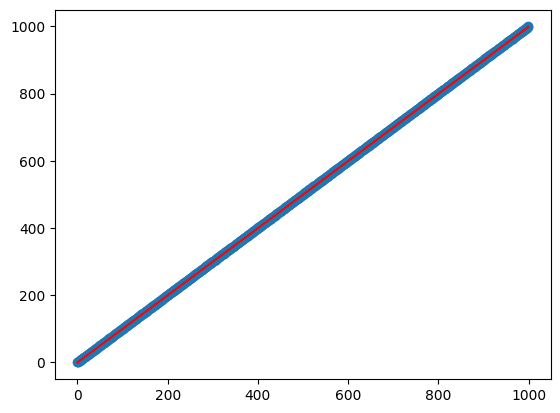

In [48]:
plt.scatter(data[:, 0], data[:, 1])

x_vals = np.sort(data[:, 0])
y_vals = model.predict(x_vals.reshape(-1, 1))

plt.plot(x_vals, y_vals, color='red')
